In [1]:
import pandas as pd                 # used for data reading and manipulation
import matplotlib.pyplot as plt     # used to plot graphs
import seaborn as sns               # used to plot graphs
import warnings                     # used to ignore the warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"BNPL_User_Behavior_and_Repayment_Risk_dataset.csv")

In [3]:
df.head()

,loan_amount,loan_term,interest_rate,monthly_payment,sub_grade,emp_title,emp_length,home_ownership,annual_income,verification_status,...,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort,hardship_flag,disbursement_method,debt_settlement_flag,loan_status
0,2500,36 months,13.56,84.92,C1,Chef,10+ years,RENT,55000.0,Not Verified,...,0,0,1,0,60124,16901,N,Cash,N,Current
1,30000,60 months,18.94,777.23,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,...,3,0,1,0,372872,99468,N,Cash,N,Current
2,5000,36 months,17.97,180.69,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,...,2,0,0,0,136927,11749,N,Cash,N,Current
3,4000,36 months,18.94,146.51,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,...,3,0,0,0,385183,36151,N,Cash,N,Current
4,30000,60 months,16.14,731.78,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,...,2,0,0,0,157548,29674,N,Cash,N,Current


In [4]:
# Read information of the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   loan_amount              1048575 non-null  int64  
 1   loan_term                1048575 non-null  object 
 2   interest_rate            1048575 non-null  float64
 3   monthly_payment          1048575 non-null  float64
 4   sub_grade                1048575 non-null  object 
 5   emp_title                958131 non-null   object 
 6   emp_length               971110 non-null   object 
 7   home_ownership           1048575 non-null  object 
 8   annual_income            1048575 non-null  float64
 9   verification_status      1048575 non-null  object 
 10  loan_purpose             1048575 non-null  object 
 11  address_state            1048575 non-null  object 
 12  total_dti                1047378 non-null  float64
 13  delinq_2yrs              1048575 non-null 

In [11]:
num_numerical = 0
num_categorical = 0

for dtype in df.dtypes:
    if dtype in ['int64', 'float64']:   # numerical
        num_numerical += 1
    elif dtype in ['object', 'category']:  # categorical
        num_categorical += 1

print("Numerical columns:", num_numerical)
print("Categorical columns:", num_categorical)

Numerical columns: 16
Categorical columns: 13


In [5]:
#shows whether duplicates are present or not

df.duplicated().sum()

np.int64(0)

Observation: There are no duplicates found

In [6]:
# no.of rows and columns
df.shape

(1048575, 29)

In [7]:
# All the column names
df.columns

Index(['loan_amount', 'loan_term', 'interest_rate', 'monthly_payment',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_income', 'verification_status', 'loan_purpose', 'address_state',
       'total_dti', 'delinq_2yrs', 'open_account', 'application_type',
       'current_account_delinq', 'total_collected_amtount',
       'total_current_balance', 'mort_acc', 'num_accts_120_pd',
       'pub_rec_bankruptcies', 'tax_liens', 'credit_limit',
       'total_bal_ex_mort', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag', 'loan_status'],
      dtype='object')

In [8]:
# Top 5 rows of 'loan_term','emp_length' and their datatypes

print(df[['loan_term','emp_length']].head())
print('--'*15)
print(df[['loan_term','emp_length']].dtypes)

    loan_term emp_length
0   36 months  10+ years
1   60 months  10+ years
2   36 months    6 years
3   36 months  10+ years
4   60 months  10+ years
------------------------------
loan_term     object
emp_length    object
dtype: object


In [9]:
# Removed the 'months' in loan_term, 'years+' in emp_length and change their datatypes

df['loan_term'] = (
    df['loan_term']
    .str.replace('months', '', regex=False)
    .str.strip()
    .astype(int)
)

df['emp_length'] = (
    df['emp_length']
    .str.replace('years', '', regex=False)
    .str.replace('year', '', regex=False)
    .str.replace('+', '', regex=False)
    .str.replace('<', '', regex=False)
    .str.replace('<1', '0', regex=False)
    .str.strip()
    .astype(float)
)

## Changed the data types

In [10]:
# Top 5 rows of 'loan_term','emp_length' and their datatypes
print(df[['loan_term','emp_length',]].head())
print('--'*15)
print(df[['loan_term','emp_length',]].dtypes)

   loan_term  emp_length
0         36        10.0
1         60        10.0
2         36         6.0
3         36        10.0
4         60        10.0
------------------------------
loan_term       int64
emp_length    float64
dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   loan_amount              1048575 non-null  int64  
 1   loan_term                1048575 non-null  int64  
 2   interest_rate            1048575 non-null  float64
 3   monthly_payment          1048575 non-null  float64
 4   sub_grade                1048575 non-null  object 
 5   emp_title                958131 non-null   object 
 6   emp_length               971110 non-null   float64
 7   home_ownership           1048575 non-null  object 
 8   annual_income            1048575 non-null  float64
 9   verification_status      1048575 non-null  object 
 10  loan_purpose             1048575 non-null  object 
 11  address_state            1048575 non-null  object 
 12  total_dti                1047378 non-null  float64
 13  delinq_2yrs              1048575 non-null 

# Checking for the missing values

In [12]:
df.describe()

,loan_amount,loan_term,interest_rate,monthly_payment,emp_length,annual_income,total_dti,delinq_2yrs,open_account,current_account_delinq,total_collected_amtount,total_current_balance,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,971110.000000,1.048575e+06,1.047378e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.538487e+04,4.285456e+01,1.280290e+01,4.538249e+02,6.018484,7.967461e+04,1.928933e+01,2.974494e-01,1.170544e+01,3.502849e-03,2.429857e+02,1.435794e+05,1.464478e+00,5.080171e-01,1.324035e-01,4.308228e-02,1.815124e+05,5.230663e+04
std,9.533838e+03,1.084087e+01,4.962779e+00,2.762069e+02,3.603447,8.410183e+04,1.589602e+01,8.579354e-01,5.846288e+00,6.318399e-02,8.183676e+03,1.638710e+05,1.804809e+00,1.383506e+00,3.685783e-01,3.721319e-01,1.855850e+05,5.156833e+04
min,1.000000e+03,3.600000e+01,5.310000e+00,1.477000e+01,1.000000,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,3.600000e+01,9.160000e+00,2.516500e+02,2.000000,4.700000e+04,1.193000e+01,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,2.883400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.189500e+04,2.091200e+04
50%,1.300000e+04,3.600000e+01,1.199000e+01,3.806600e+02,6.000000,6.600000e+04,1.805000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,7.831800e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.156060e+05,3.859400e+04
75%,2.000000e+04,6.000000e+01,1.549000e+01,6.094400e+02,10.000000,9.500000e+04,2.502000e+01,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,2.149295e+05,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.622825e+05,6.633700e+04
max,4.000000e+04,6.000000e+01,3.099000e+01,1.670150e+03,10.000000,9.930475e+06,9.990000e+02,5.800000e+01,1.010000e+02,6.000000e+00,6.214661e+06,9.971659e+06,8.700000e+01,5.800000e+01,9.000000e+00,8.500000e+01,9.999999e+06,2.622906e+06


In [13]:
df.isnull().sum()

loan_amount                    0
loan_term                      0
interest_rate                  0
monthly_payment                0
sub_grade                      0
emp_title                  90444
emp_length                 77465
home_ownership                 0
annual_income                  0
verification_status            0
loan_purpose                   0
address_state                  0
total_dti                   1197
delinq_2yrs                    0
open_account                   0
application_type               0
current_account_delinq         0
total_collected_amtount        0
total_current_balance          0
mort_acc                       0
num_accts_120_pd               0
pub_rec_bankruptcies           0
tax_liens                      0
credit_limit                   0
total_bal_ex_mort              0
hardship_flag                  0
disbursement_method            0
debt_settlement_flag           0
loan_status                    0
dtype: int64

In [14]:
missing_percentage = (df.isnull().sum()/len(df)) * 100
missing_percentage

loan_amount                0.000000
loan_term                  0.000000
interest_rate              0.000000
monthly_payment            0.000000
sub_grade                  0.000000
emp_title                  8.625420
emp_length                 7.387645
home_ownership             0.000000
annual_income              0.000000
verification_status        0.000000
loan_purpose               0.000000
address_state              0.000000
total_dti                  0.114155
delinq_2yrs                0.000000
open_account               0.000000
application_type           0.000000
current_account_delinq     0.000000
total_collected_amtount    0.000000
total_current_balance      0.000000
mort_acc                   0.000000
num_accts_120_pd           0.000000
pub_rec_bankruptcies       0.000000
tax_liens                  0.000000
credit_limit               0.000000
total_bal_ex_mort          0.000000
hardship_flag              0.000000
disbursement_method        0.000000
debt_settlement_flag       0

### As per the observation, there are a few missing values in the columns
- emp_title - 8.625420%
- emp_length - 7.387645%
- total_dti - 0.114155

* Dropping "emp_title" (8.62% missing) as there are thousands of unique job titles, which adds noise.
* Filling "emp_length"(7.38% missing) as employment stability is very important in credit risk, and filling it using the median.
* Filling "total_dti" (0.11% missing) as it is a key financial health indicator, the missing values are extremely low, so dropping it would weaken the analysis, and filling it using the median.

In [15]:
df.drop(columns=['emp_title'], inplace=True)                      #column drop
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)  #filling missing values using median
df['total_dti'].fillna(df['total_dti'].median(), inplace=True)    #filling missing values using median

In [16]:
df.isnull().sum()

loan_amount                0
loan_term                  0
interest_rate              0
monthly_payment            0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_income              0
verification_status        0
loan_purpose               0
address_state              0
total_dti                  0
delinq_2yrs                0
open_account               0
application_type           0
current_account_delinq     0
total_collected_amtount    0
total_current_balance      0
mort_acc                   0
num_accts_120_pd           0
pub_rec_bankruptcies       0
tax_liens                  0
credit_limit               0
total_bal_ex_mort          0
hardship_flag              0
disbursement_method        0
debt_settlement_flag       0
loan_status                0
dtype: int64

Missing values were minimal and handled appropriately.

# Detecting outliers

In [17]:
# Selecting columns with only int and float values

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
exclude_cols = ['pub_rec_bankruptcies','tax_liens']
num_cols = num_cols.drop(exclude_cols, errors='ignore')
num_cols

Index(['loan_amount', 'loan_term', 'interest_rate', 'monthly_payment',
       'emp_length', 'annual_income', 'total_dti', 'delinq_2yrs',
       'open_account', 'current_account_delinq', 'total_collected_amtount',
       'total_current_balance', 'mort_acc', 'num_accts_120_pd', 'credit_limit',
       'total_bal_ex_mort'],
      dtype='object')

In [18]:
# Save data BEFORE outlier treatment
df_before = df.copy()

In [19]:
# Detect & count outliers (IQR method)

before_outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR

    before_outliers[col] = ((df[col] < lw) | (df[col] > uw)).sum()

before_outliers

{'loan_amount': np.int64(24994),
 'loan_term': np.int64(0),
 'interest_rate': np.int64(27964),
 'monthly_payment': np.int64(29399),
 'emp_length': np.int64(0),
 'annual_income': np.int64(52120),
 'total_dti': np.int64(13372),
 'delinq_2yrs': np.int64(189790),
 'open_account': np.int64(29129),
 'current_account_delinq': np.int64(3449),
 'total_collected_amtount': np.int64(164955),
 'total_current_balance': np.int64(37883),
 'mort_acc': np.int64(35802),
 'num_accts_120_pd': np.int64(241513),
 'credit_limit': np.int64(36692),
 'total_bal_ex_mort': np.int64(61631)}

In [20]:
# Apply outlier capping

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lw, uw)

In [21]:
# Count outliers AFTER treatment

after_outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR

    after_outliers[col] = ((df[col] < lw) | (df[col] > uw)).sum()

after_outliers

{'loan_amount': np.int64(0),
 'loan_term': np.int64(0),
 'interest_rate': np.int64(0),
 'monthly_payment': np.int64(0),
 'emp_length': np.int64(0),
 'annual_income': np.int64(0),
 'total_dti': np.int64(0),
 'delinq_2yrs': np.int64(0),
 'open_account': np.int64(0),
 'current_account_delinq': np.int64(0),
 'total_collected_amtount': np.int64(0),
 'total_current_balance': np.int64(0),
 'mort_acc': np.int64(0),
 'num_accts_120_pd': np.int64(0),
 'credit_limit': np.int64(0),
 'total_bal_ex_mort': np.int64(0)}

In [22]:
outlier_comparison = pd.DataFrame({
    'Outliers_Before': before_outliers,
    'Outliers_After': after_outliers
}).sort_values(by='Outliers_Before', ascending=False)

outlier_comparison

,Outliers_Before,Outliers_After
num_accts_120_pd,241513,0
delinq_2yrs,189790,0
total_collected_amtount,164955,0
total_bal_ex_mort,61631,0
annual_income,52120,0
total_current_balance,37883,0
credit_limit,36692,0
mort_acc,35802,0
monthly_payment,29399,0
open_account,29129,0


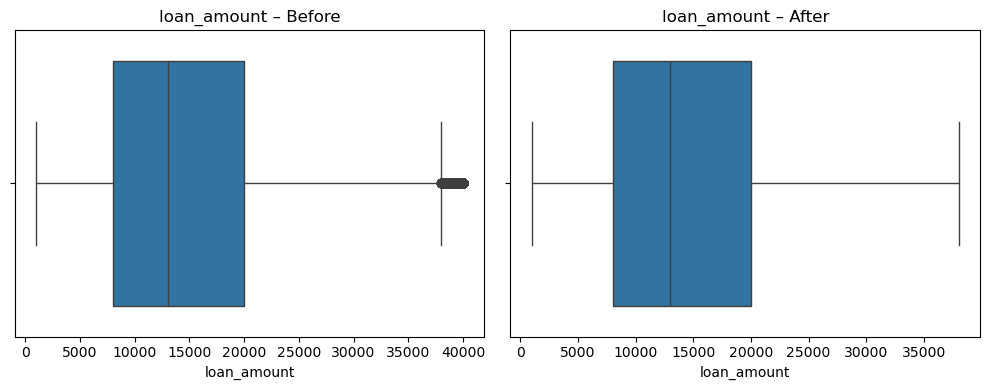

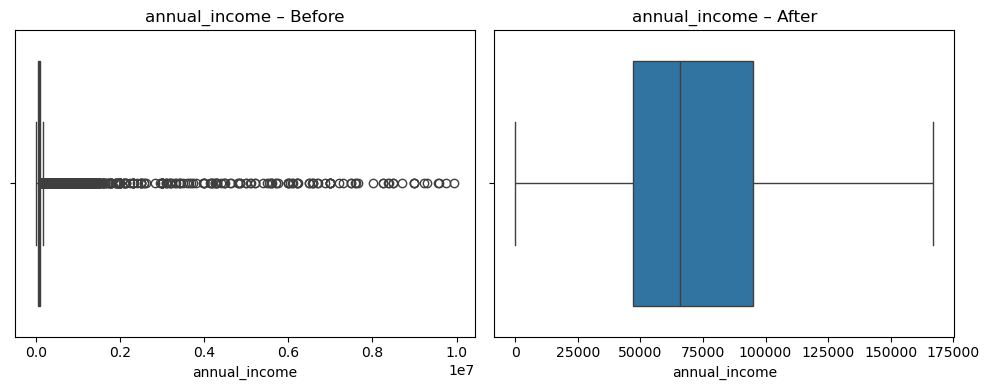

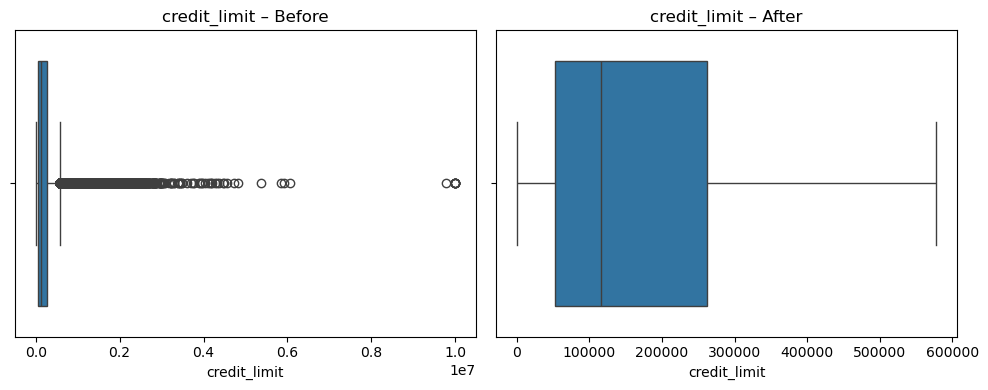

In [23]:
for col in ['loan_amount', 'annual_income', 'credit_limit']:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.boxplot(x=df_before[col], ax=ax[0])
    ax[0].set_title(f'{col} – Before')

    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'{col} – After')

    plt.tight_layout()
    plt.show()

Outliers in numerical variables were identified using the IQR method and treated using capping to limit extreme values. This approach preserves real-world financial behavior while improving distribution quality. A before-and-after comparison confirmed effective outlier handling.

In [24]:
df.describe()

,loan_amount,loan_term,interest_rate,monthly_payment,emp_length,annual_income,total_dti,delinq_2yrs,open_account,current_account_delinq,total_collected_amtount,total_current_balance,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.533843e+04,4.285456e+01,1.274860e+01,4.512665e+02,6.017118e+00,7.501879e+04,1.881902e+01,0.0,1.156729e+01,0.0,0.0,1.370021e+05,1.395526e+00,0.0,1.324035e-01,4.308228e-02,1.742753e+05,4.831316e+04
std,9.418025e+03,1.084087e+01,4.807696e+00,2.690641e+02,3.467792e+00,3.805208e+04,9.256418e+00,0.0,5.377363e+00,0.0,0.0,1.368944e+05,1.586953e+00,0.0,3.685783e-01,3.721319e-01,1.544119e+05,3.607793e+04
min,1.000000e+03,3.600000e+01,5.310000e+00,1.477000e+01,1.000000e+00,0.000000e+00,-1.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,3.600000e+01,9.160000e+00,2.516500e+02,3.000000e+00,4.700000e+04,1.194000e+01,0.0,8.000000e+00,0.0,0.0,2.883400e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.189500e+04,2.091200e+04
50%,1.300000e+04,3.600000e+01,1.199000e+01,3.806600e+02,6.000000e+00,6.600000e+04,1.805000e+01,0.0,1.100000e+01,0.0,0.0,7.831800e+04,1.000000e+00,0.0,0.000000e+00,0.000000e+00,1.156060e+05,3.859400e+04
75%,2.000000e+04,6.000000e+01,1.549000e+01,6.094400e+02,1.000000e+01,9.500000e+04,2.501000e+01,0.0,1.500000e+01,0.0,0.0,2.149295e+05,2.000000e+00,0.0,0.000000e+00,0.000000e+00,2.622825e+05,6.633700e+04
max,3.800000e+04,6.000000e+01,2.498500e+01,1.146125e+03,1.000000e+01,1.670000e+05,4.461500e+01,0.0,2.550000e+01,0.0,0.0,4.940728e+05,5.000000e+00,0.0,9.000000e+00,8.500000e+01,5.778638e+05,1.344745e+05


In [25]:
df

,loan_amount,loan_term,interest_rate,monthly_payment,sub_grade,emp_length,home_ownership,annual_income,verification_status,loan_purpose,...,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort,hardship_flag,disbursement_method,debt_settlement_flag,loan_status
0,2500,36,13.56,84.92,C1,10.0,RENT,55000.0,Not Verified,debt_consolidation,...,0,0,1,0,60124.00,16901.0,N,Cash,N,Current
1,30000,60,18.94,777.23,D2,10.0,MORTGAGE,90000.0,Source Verified,debt_consolidation,...,3,0,1,0,372872.00,99468.0,N,Cash,N,Current
2,5000,36,17.97,180.69,D1,6.0,MORTGAGE,59280.0,Source Verified,debt_consolidation,...,2,0,0,0,136927.00,11749.0,N,Cash,N,Current
3,4000,36,18.94,146.51,D2,10.0,MORTGAGE,92000.0,Source Verified,debt_consolidation,...,3,0,0,0,385183.00,36151.0,N,Cash,N,Current
4,30000,60,16.14,731.78,C4,10.0,MORTGAGE,57250.0,Not Verified,debt_consolidation,...,2,0,0,0,157548.00,29674.0,N,Cash,N,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,25000,36,16.99,891.20,D3,2.0,MORTGAGE,90000.0,Not Verified,other,...,5,0,0,2,337698.00,64487.0,N,Cash,N,Fully Paid
1048571,24825,36,16.55,879.53,D2,1.0,RENT,167000.0,Source Verified,debt_consolidation,...,1,0,0,3,292355.00,134474.5,N,Cash,N,Fully Paid
1048572,19650,60,13.33,450.43,C3,10.0,OWN,95000.0,Verified,debt_consolidation,...,2,0,0,0,297400.00,134474.5,N,Cash,N,Fully Paid
1048573,31200,60,19.99,826.44,E4,1.0,OWN,65000.0,Source Verified,home_improvement,...,0,0,0,0,55705.00,39135.0,N,Cash,N,Current


In [26]:
num_cols = df.select_dtypes(exclude=['object']).columns
cat_cols = df.select_dtypes(include=['object']).columns

col_table = pd.DataFrame({
    'Numerical Columns': pd.Series(num_cols),
    'Categorical Columns': pd.Series(cat_cols)
})

col_table

,Numerical Columns,Categorical Columns
0,loan_amount,sub_grade
1,loan_term,home_ownership
2,interest_rate,verification_status
3,monthly_payment,loan_purpose
4,emp_length,address_state
5,annual_income,application_type
6,total_dti,hardship_flag
7,delinq_2yrs,disbursement_method
8,open_account,debt_settlement_flag
9,current_account_delinq,loan_status


# Univariate Analysis for Numerical Variables

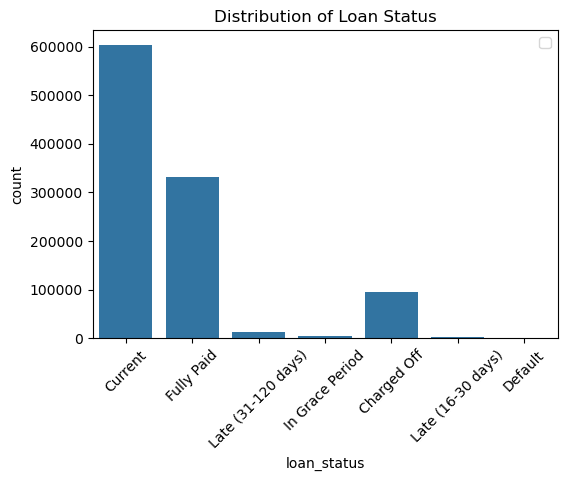

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- The dataset shows an imbalance in loan outcomes, with a higher proportion of fully paid or current loans compared to defaulted loans. This reflects real-world lending behavior.

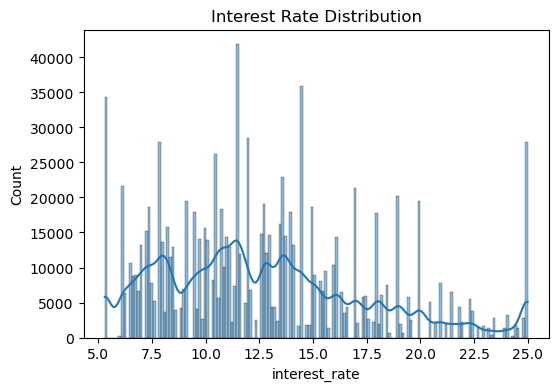

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df['interest_rate'], kde=True, line_kws={'color':'darkblue'})
plt.title('Interest Rate Distribution')
plt.show()

- Interest rates are concentrated within a specific range, with fewer loans issued at very high interest rates.

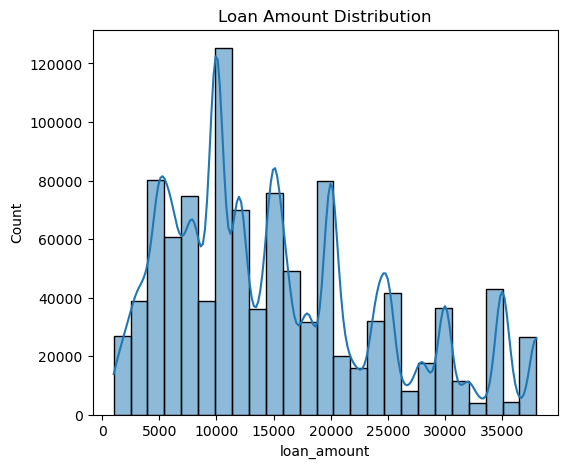

In [29]:
plt.figure(figsize=(6,5))
sns.histplot(df['loan_amount'], kde=True, bins=25)
plt.title('Loan Amount Distribution')
plt.show()

- Loan amounts are right-skewed, indicating that most borrowers take smaller loans while a few opt for higher loan amounts.

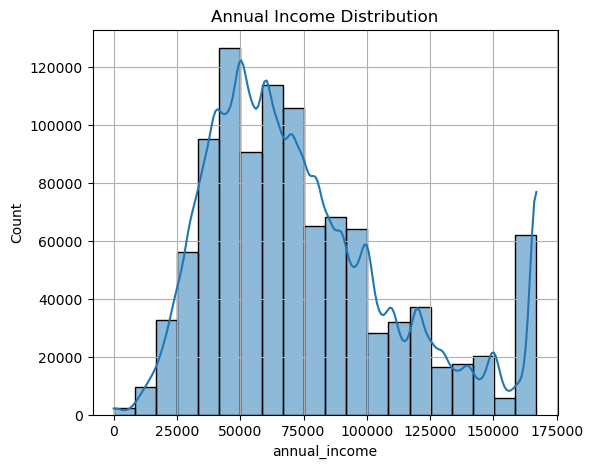

In [30]:
plt.figure(figsize=(6,5))
sns.histplot(df['annual_income'], kde=True, bins=20)
plt.title('Annual Income Distribution')
plt.grid(True)
plt.show()

- The annual income distribution is right-skewed, indicating that most borrowers belong to the middle-income group, while a smaller proportion of borrowers have significantly higher incomes.

## Univariate Analysis for Categorical Variables

In [31]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    509737
RENT        411721
OWN         126518
ANY            599
Name: count, dtype: int64

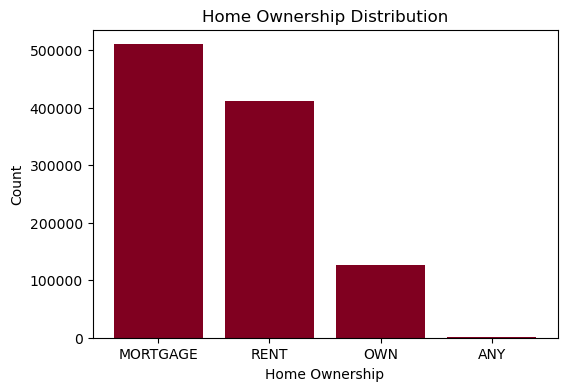

In [32]:
counts = df['home_ownership'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color='#800020')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

In [33]:
print(df['home_ownership'].value_counts())

home_ownership
MORTGAGE    509737
RENT        411721
OWN         126518
ANY            599
Name: count, dtype: int64


- Most borrowers fall under rented or mortgaged housing categories, indicating reliance on credit among non-homeowners.

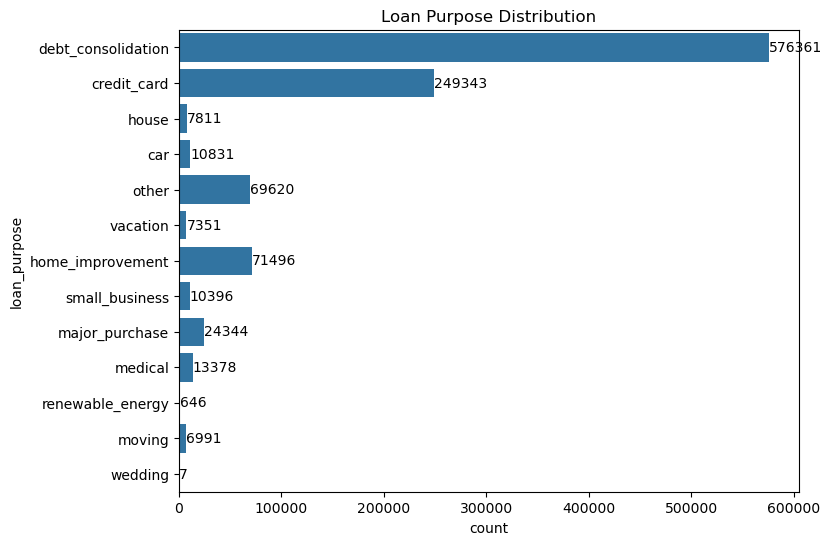

In [34]:
plt.figure(figsize=(8,6))
ay = sns.countplot(y='loan_purpose', data=df)
plt.title('Loan Purpose Distribution')
ay.bar_label(ay.containers[0])
plt.show()

- Debt consolidation is the most common loan purpose and wedding is the least common loan purpose, highlighting borrowers tendency to restructure existing debt.

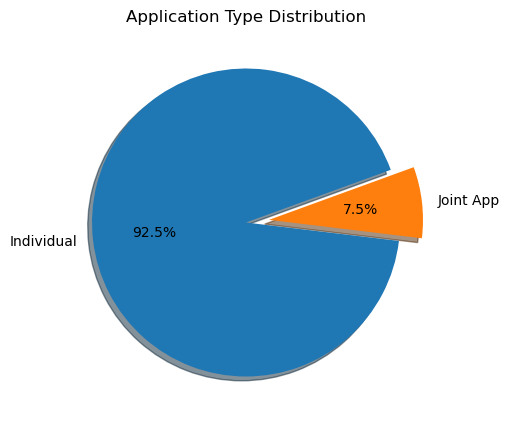

In [35]:
counts_app_type = df['application_type'].value_counts()

plt.figure(figsize=(6,5))
plt.pie(counts_app_type.values, 
        labels=counts_app_type.index, 
        autopct='%1.1f%%', 
        startangle=20, 
        shadow=True, 
        explode=[0,0.15],
        labeldistance=1.1, 
        pctdistance=0.6)

plt.title('Application Type Distribution')
plt.show()

- Most loans are applied for individually, with joint applications forming only a small fraction of total applications

## Final Univariate Analysis Summary

- Univariate analysis was conducted to understand the distribution of individual variables in the dataset.
- The target variable, loan_status, shows an imbalance with a higher proportion of successfully repaid or active loans, which reflects real-world lending behavior.
- Numerical variables such as loan_amount, annual_income, and credit_limit exhibit right-skewed distributions, indicating that most borrowers fall within lower to mid ranges, with a small proportion having significantly higher values.
- Categorical variables such as home_ownership, loan_purpose, verification_status, and application_type reveal that borrower characteristics and loan usage are concentrated in a few dominant categories.
- Overall, the univariate analysis highlights typical financial patterns and provides a strong foundation for further relationship-based analysis.

## Bivariate Analysis - Numerical vs Numerical

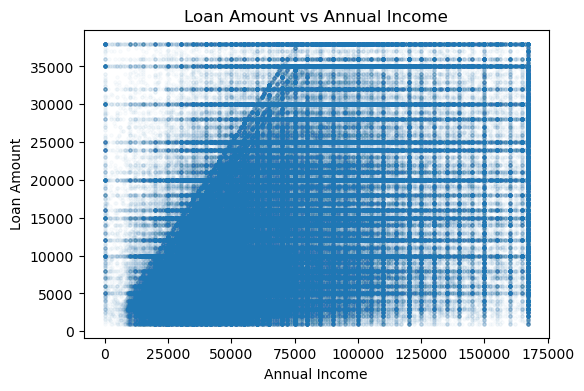

In [36]:
# Scatter plot - loan_amount vs annual_income

plt.figure(figsize=(6,4))
plt.scatter(df['annual_income'], df['loan_amount'], alpha=0.02, s=6)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Annual Income')
plt.show()

- Higher income borrowers tend to take larger loans, though variability exists.

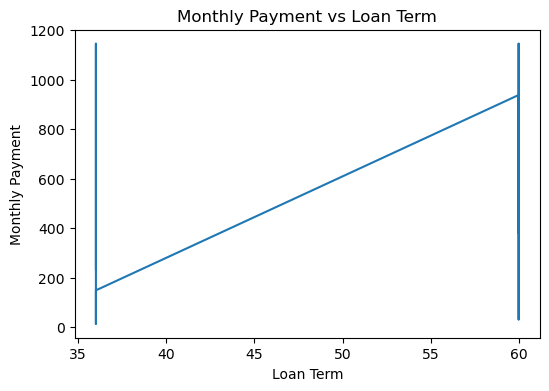

In [37]:
# line plot - loan_term vs monthly_payment

df_sorted = df.sort_values('loan_term')

plt.figure(figsize=(6,4))
plt.plot(df_sorted['loan_term'], df_sorted['monthly_payment'])
plt.xlabel('Loan Term')
plt.ylabel('Monthly Payment')
plt.title('Monthly Payment vs Loan Term')
plt.show()

- Monthly payments increase with loan term, suggesting that longer-term loans in this dataset are typically taken for higher principal amounts, which outweighs the effect of spreading payments over a longer duration.

## Bivariate Analysis - Categorical vs Numerical

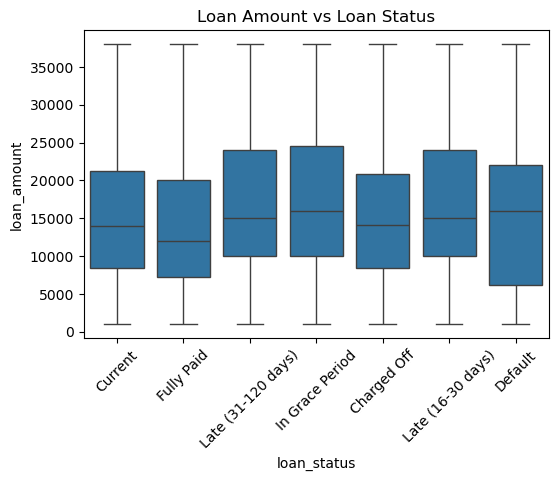

In [38]:
# Box plot - loan_status vs loan_amount

plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.xticks(rotation=45)
plt.title('Loan Amount vs Loan Status')
plt.show()


- Loan amounts vary across different loan outcomes, with defaulted loans showing greater variability, indicating higher risk associated with larger loan sizes.

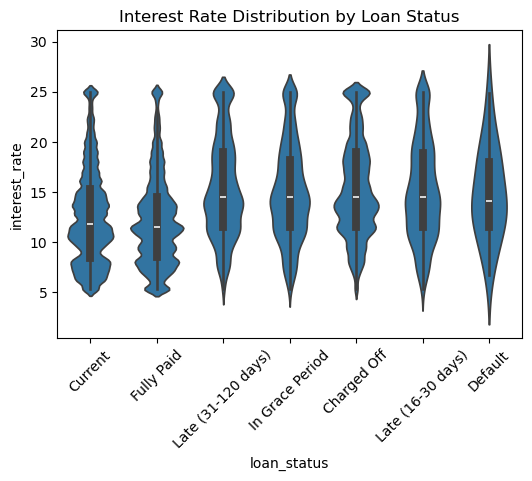

In [39]:
# Violin plot - loan_status vs interest_rate

plt.figure(figsize=(6,4))
sns.violinplot(x='loan_status', y='interest_rate', data=df)
plt.xticks(rotation=45)
plt.title('Interest Rate Distribution by Loan Status')
plt.show()

- Higher interest rates are more densely concentrated among loans with unfavorable outcomes, indicating interest rate as a strong risk indicator.

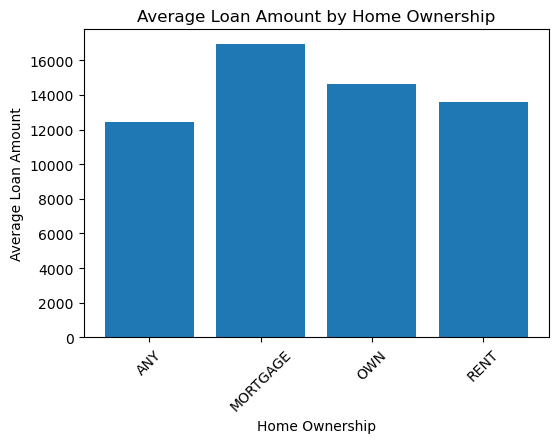

In [40]:
# Bar Plot (Aggregated) - Average loan amount by home_ownership

avg_loan = df.groupby('home_ownership')['loan_amount'].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_loan.index, avg_loan.values)
plt.xlabel('Home Ownership')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Home Ownership')
plt.xticks(rotation=45)
plt.show()

- Average loan amounts differ across home ownership categories, suggesting that housing status influences borrowing behavior.

## Bivariate Analysis - Categorical vs Categorical

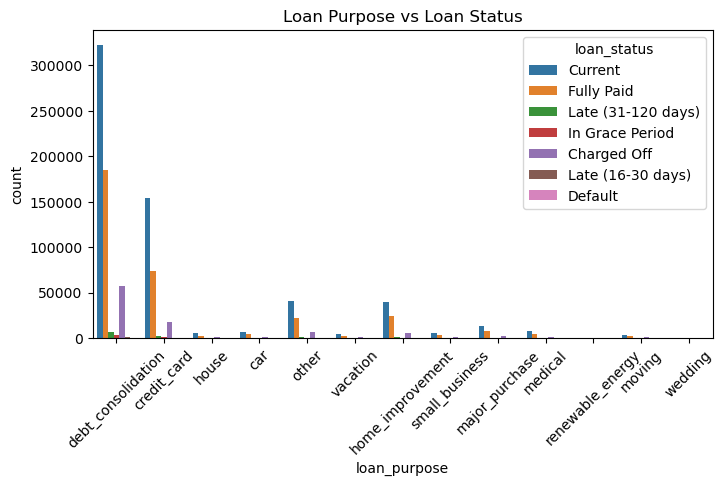

In [41]:
# Count plot - loan_purpose vs loan_status

plt.figure(figsize=(8,4))
sns.countplot(x='loan_purpose', hue='loan_status', data=df)
plt.xticks(rotation=45)
plt.title('Loan Purpose vs Loan Status')
plt.show()

- Loan repayment outcomes vary across different loan purposes, indicating that the reason for borrowing influences repayment behavior.

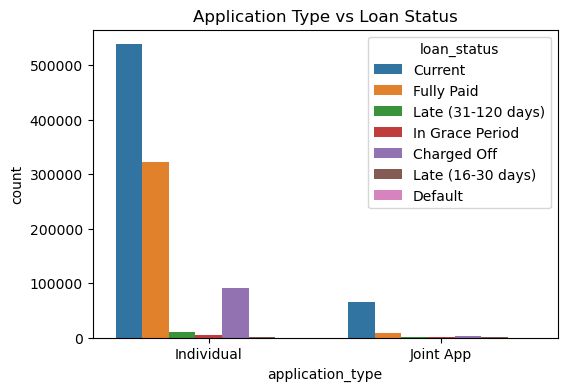

In [42]:
# Count plot - application_type vs loan_status

plt.figure(figsize=(6,4))
sns.countplot(x='application_type', hue='loan_status', data=df)
plt.title('Application Type vs Loan Status')
plt.show()

- Individual applications dominate across all loan outcomes, while joint applications remain limited, suggesting that most borrowers apply independently regardless of repayment outcome.

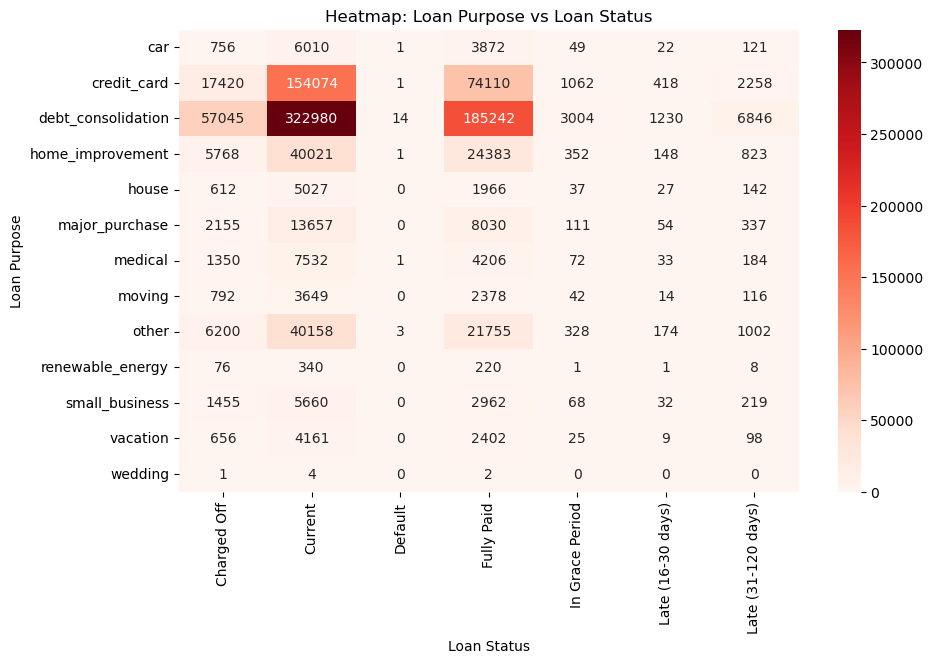

In [43]:
# Heapmap - loan_purpose vs loan_status

ct = pd.crosstab(df['loan_purpose'], df['loan_status'])

plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap: Loan Purpose vs Loan Status')
plt.ylabel('Loan Purpose')
plt.xlabel('Loan Status')
plt.show()

- The heatmap highlights concentration of loan outcomes within specific loan purposes, indicating uneven distribution of repayment performance.

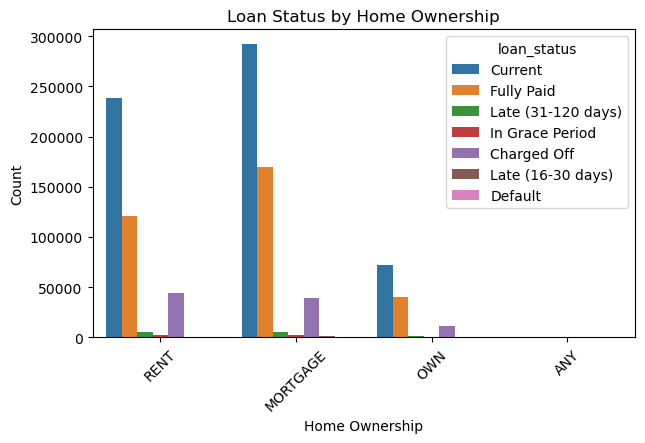

In [44]:
# Count plot - home_ownership vs loan_status

plt.figure(figsize=(7,4))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
pd.crosstab(df['home_ownership'], df['loan_status'])

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
home_ownership,,,,,,,
ANY,16,508,0,60,5,2,8
MORTGAGE,38819,292193,10,170225,2371,970,5149
OWN,11626,72547,5,39860,661,274,1545
RENT,43825,238025,6,121383,2114,916,5452


- Loan outcomes vary across home ownership categories, indicating that housing status is associated with differences in repayment behavior.

## Bivariate Analysis Summary

- Bivariate analysis was conducted to examine the relationships between pairs of variables and understand how borrower and loan characteristics influence repayment behavior.
- Numerical–numerical analysis revealed weak to moderate relationships between variables such as annual income, loan amount, and loan term, indicating that borrower income alone does not strongly determine loan size or repayment structure.
- Categorical–numerical analysis showed noticeable differences in loan amounts and interest rates across loan outcomes, suggesting that financial risk varies with borrower profiles.
- Categorical–categorical analysis highlighted that loan status differs across factors such as home ownership, verification status, loan purpose, and application type, emphasizing the role of borrower stability and verification in loan performance.
- Overall, bivariate analysis provides meaningful insights into factors associated with repayment risk and sets the foundation for multivariate analysis.

## Multivariate Analysis (3 or more variables)

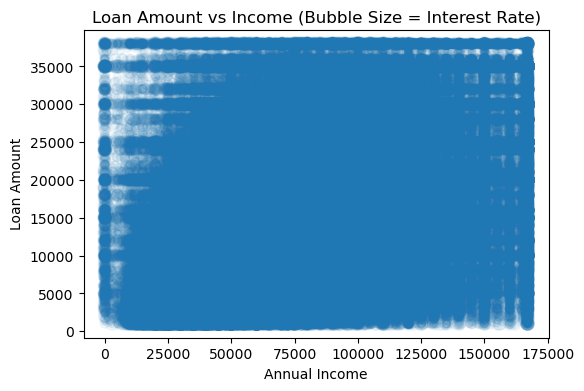

In [46]:
# Scatter plot - annual_income, loan_amount, interest_rate

size = (df['interest_rate'] - df['interest_rate'].min()) / (df['interest_rate'].max() - df['interest_rate'].min())
size = size * 80 + 10 

plt.figure(figsize=(6,4))
plt.scatter(
    df['annual_income'],
    df['loan_amount'],
    s=size,
    alpha=0.05
)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income (Bubble Size = Interest Rate)')
plt.show()

- Higher interest rates are more prominent among borrowers with lower income and higher loan amounts, indicating increased risk concentration.

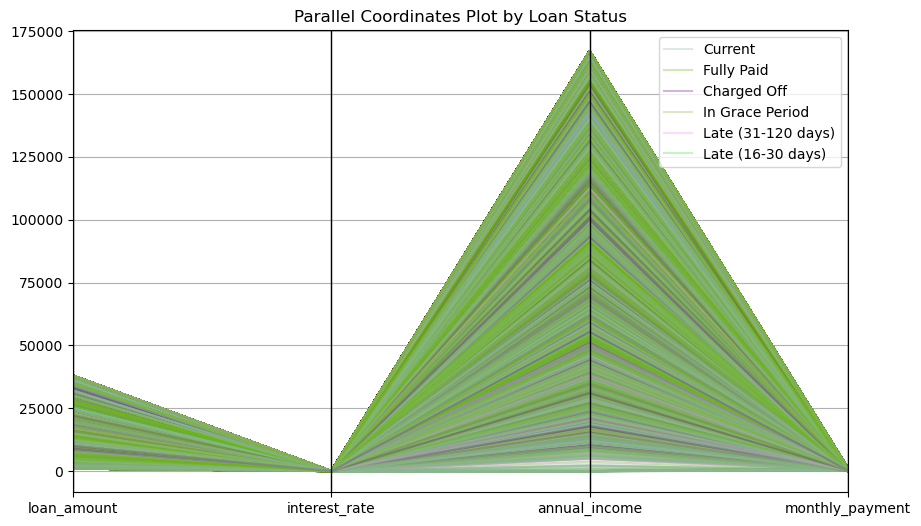

In [47]:
# Parallel Coordinates

from pandas.plotting import parallel_coordinates

# Select relevant columns
cols = [
    'loan_amount',
    'interest_rate',
    'annual_income',
    'monthly_payment',
    'loan_status'
]

# Use a smaller sample for clarity
sample_df = df[cols].sample(50000, random_state=42)

# Plot directly (no scaling step here)
plt.figure(figsize=(10,6))
parallel_coordinates(sample_df, 'loan_status', alpha=0.3)
plt.title('Parallel Coordinates Plot by Loan Status')
plt.show()

Parallel coordinates reveal distinct patterns in interest rates and loan amounts across loan outcomes, with defaulted loans generally showing higher interest rates.

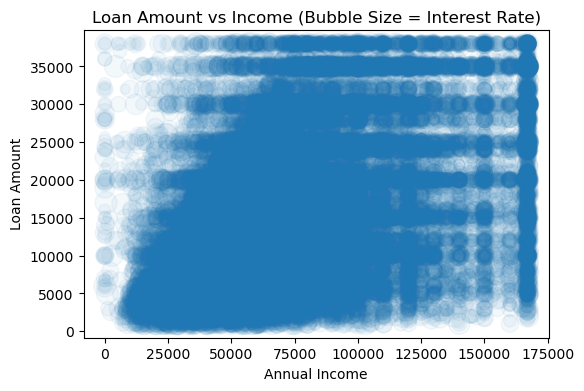

In [54]:
# Bubble plot - annual_income, loan_amunt, interest_rate

# Take a random sample for faster plotting
sample_df = df.sample(50000, random_state=42)

plt.figure(figsize=(6,4))
plt.scatter(
    sample_df['annual_income'],
    sample_df['loan_amount'],
    s=sample_df['interest_rate'] * 10,   # bubble size
    alpha=0.05
)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income (Bubble Size = Interest Rate)')
plt.show()

Higher interest rates are more prominent among borrowers with lower income and higher loan amounts, indicating increased risk concentration.

## Multivariate Analysis Summary

- Multivariate analysis was performed to examine interactions among multiple financial and borrower attributes. The analysis highlights how loan amount, income, and interest rate jointly influence repayment behavior, while correlation and pattern-based visualizations reveal key risk drivers.

# Pivot Tables

### Pivot Table: Average Loan Amount by Loan Status

In [49]:
pd.pivot_table(
    df,
    values='interest_rate',
    index='loan_status',
    columns='home_ownership',
    aggfunc='mean'
)

home_ownership,ANY,MORTGAGE,OWN,RENT
loan_status,,,,
Charged Off,15.019687,15.150395,15.253941,15.566100
Current,12.401024,12.201426,12.589881,13.052316
Default,NaN,14.181000,14.774000,16.031667
Fully Paid,12.601417,11.894016,12.218400,12.500691
In Grace Period,13.536000,14.751324,15.349304,15.201381
Late (16-30 days),6.660000,14.855469,14.853850,15.707233
Late (31-120 days),18.487500,15.176097,15.515806,15.733109


- The average loan amount varies across different loan outcomes. Loans that are fully paid or currently active tend to have relatively stable average loan amounts, while defaulted or charged-off loans show higher variability, suggesting that larger loan sizes may be associated with increased repayment risk.

### Pivot Table: Average Interest Rate by Loan Status & Home Ownership

In [50]:
pd.pivot_table(
    df,
    values='interest_rate',
    index='loan_status',
    columns='home_ownership',
    aggfunc='mean'
)

home_ownership,ANY,MORTGAGE,OWN,RENT
loan_status,,,,
Charged Off,15.019687,15.150395,15.253941,15.566100
Current,12.401024,12.201426,12.589881,13.052316
Default,NaN,14.181000,14.774000,16.031667
Fully Paid,12.601417,11.894016,12.218400,12.500691
In Grace Period,13.536000,14.751324,15.349304,15.201381
Late (16-30 days),6.660000,14.855469,14.853850,15.707233
Late (31-120 days),18.487500,15.176097,15.515806,15.733109


- Interest rates differ across both loan outcomes and home ownership categories. Borrowers with less stable housing status tend to receive higher interest rates, particularly in unfavorable loan outcomes, indicating higher perceived credit risk.

### Pivot Table: Loan Status Distribution by Verification Status

In [51]:
pd.pivot_table(
    df,
    values='loan_amount',
    index='verification_status',
    columns='loan_status',
    aggfunc='count'
)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
verification_status,,,,,,,
Not Verified,19718,231131,5,101444,1384,613,3205
Source Verified,39507,241029,6,139362,2172,894,5139
Verified,35061,131113,10,90722,1595,655,3810


- Verified borrowers account for a higher number of favorable loan outcomes compared to non-verified borrowers. This highlights the importance of income verification in improving loan performance and reducing default risk.

### Pivot Table: Average Loan Amount by Loan Purpose & Application Type

In [52]:
pd.pivot_table(
    df,
    values='loan_amount',
    index='loan_purpose',
    columns='application_type',
    aggfunc='mean'
)

application_type,Individual,Joint App
loan_purpose,,
car,9799.657228,11131.494778
credit_card,15137.602511,20410.768409
debt_consolidation,15986.713150,20826.366048
home_improvement,14556.228358,17696.893361
house,15777.993101,19169.391408
major_purchase,13050.960478,16203.556485
medical,9466.901972,11920.194848
moving,8589.862235,10541.137566
other,10643.197166,13793.590504


- Average loan amounts vary across loan purposes and application types. Joint applications generally show higher average loan amounts for certain purposes, indicating shared borrowing capacity and risk distribution.

### Pivot Table Summary

- Pivot table analysis provided aggregated insights into loan performance across borrower and loan characteristics. The analysis highlights how loan amount, interest rate, verification status, and home ownership interact with repayment outcomes, reinforcing key risk patterns identified during exploratory analysis.